# Initial Data

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/ecg.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [3]:
df.data = df.drop(140, axis=1)
df.target =  df[140]

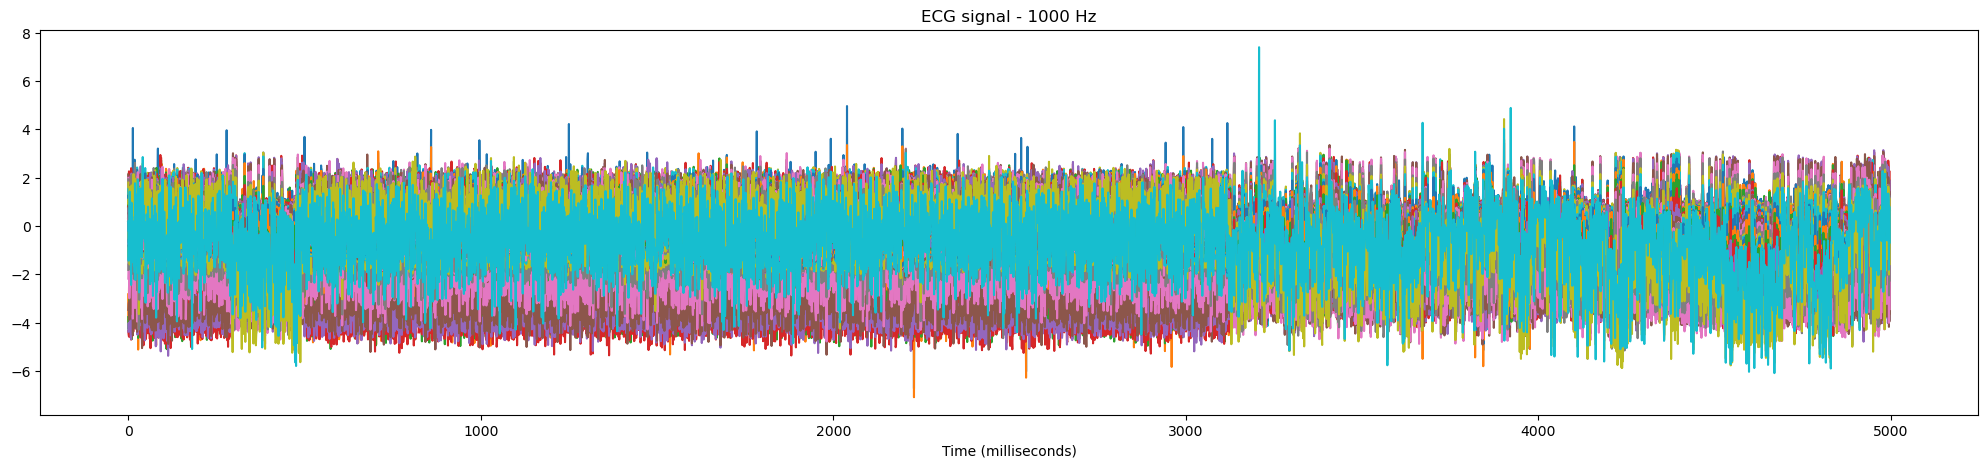

In [4]:
from matplotlib import pyplot as plt
# plot
plt.figure(figsize=(25, 5))

plt.title("ECG signal - 1000 Hz")
plt.plot(df.data)
plt.xlabel('Time (milliseconds)')
plt.show()

# Evaluation & Classification

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import accuracy_score,median_absolute_error,mean_squared_error

from sklearn.linear_model import LogisticRegression

In [6]:
def Evaluations(y_test,y_pred):
    print(f"NMI : {normalized_mutual_info_score(y_test,y_pred)}")
    print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
    print(f"MSE : {mean_squared_error(y_test,y_pred)}"  )

In [7]:
def classification_eval(data):
    x_train,x_test,y_train,y_test = train_test_split(data,df.target,test_size = 0.2,random_state = 129)
    model = LogisticRegression(random_state=0,max_iter=200)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    Evaluations(y_test,y_pred)


# Feature Extraction

## PCA

In [8]:
from sklearn.decomposition import PCA


In [9]:
n_components = 20
pca = PCA(n_components= n_components)
pca.fit(df.data)
pca_result = pca.transform(df.data)
pca_result

array([[-4.38794352,  1.24059711,  0.34435092, ...,  0.18823397,
        -0.03945709, -0.0105979 ],
       [-4.4128061 ,  4.62554294, -1.61562817, ..., -0.01722249,
        -0.12327492,  0.01738391],
       [-3.71986855,  1.94636627, -1.25308579, ...,  0.30667196,
         0.20957742, -0.2013268 ],
       ...,
       [ 5.70204897, -0.83088192, -3.43652561, ..., -0.22351519,
         0.86767538, -0.1821635 ],
       [-4.94938058, -5.16321113,  0.5416519 , ...,  0.03207821,
        -0.61152548, -0.28672255],
       [ 6.50363189,  0.78564071, -1.03857541, ..., -0.04102287,
         0.03278171, -0.16415811]])

In [10]:
classification_eval(pca_result)

NMI : 0.9540178273546969
Accuracy Score : 0.995
MSE : 0.005


## NMF

            In the ECG data, due to the presence of a negative number, the NMF method cannot be used, so it must be scaled.

In [11]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

In [12]:
n_components=30
#scaled
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.data)
model = NMF(n_components=n_components , init='random', random_state=0)
nmf_result = model.fit_transform(scaled_data)

classification_eval(nmf_result)

NMI : 0.9467621482354845
Accuracy Score : 0.994
MSE : 0.006


## Laplacian Eigenmap

In [13]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import SpectralEmbedding
from sklearn.neighbors import kneighbors_graph


In [14]:
#Convert ECG to Graph & matrix
distance_matrix = pairwise_distances(df.data, metric='euclidean')

k_neighbors = 5

graph_matrix = kneighbors_graph(distance_matrix, n_neighbors=k_neighbors, mode='connectivity', include_self=False)

adjacency_matrix = graph_matrix.toarray()

In [15]:
n_components = 10
model = SpectralEmbedding(n_components=10,affinity='nearest_neighbors')
lp_result = model.fit_transform(adjacency_matrix)
lp_result.shape

(4998, 10)

In [16]:
lp_result

array([[ 8.98831914e-04,  2.15460526e-04,  4.58222631e-04, ...,
        -1.59511325e-04,  5.35157952e-05, -7.97330491e-05],
       [ 2.21062248e-03,  1.88830410e-04,  7.64938949e-04, ...,
        -1.38964419e-05, -3.18788036e-05, -9.35347823e-04],
       [ 4.49300688e-04, -1.29419157e-05, -1.05575776e-04, ...,
        -3.50582361e-05, -5.81345970e-05, -2.16863726e-04],
       ...,
       [-1.13549458e-05, -3.12918186e-05, -1.70154377e-04, ...,
        -2.74775552e-05, -1.63741481e-05,  1.85736902e-04],
       [ 1.12202643e-03,  9.57101580e-05,  3.39527665e-04, ...,
        -9.73142315e-05, -2.87857932e-05, -3.87359977e-04],
       [-3.15156152e-04, -1.11124878e-04, -6.72180785e-04, ...,
        -7.16104771e-04, -1.05012486e-04, -1.50126652e-03]])

In [17]:

classification_eval(lp_result)

NMI : 0.0
Accuracy Score : 0.578
MSE : 0.422
